### Import Modules and Packages

In [1]:
import numpy as np
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from os import getcwd
from tensorflow.keras.preprocessing.image import ImageDataGenerator

### Load Dataset

In [2]:
data_train=pd.read_csv('sign_mnist_train.csv')
data_test=pd.read_csv('sign_mnist_test.csv')

In [3]:
data_train

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27696,1,135,119,108,102,105,99,61,103,121,...,108,112,116,114,118,180,184,176,167,163
27697,12,157,159,161,164,166,166,171,174,175,...,213,213,213,214,213,211,210,210,209,208
27698,2,190,191,190,191,190,190,192,192,191,...,216,215,213,214,214,213,210,211,209,208
27699,4,201,205,208,209,214,216,218,223,226,...,112,169,255,255,237,113,91,67,70,63


In [4]:
data_test

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,6,149,149,150,150,150,151,151,150,151,...,138,148,127,89,82,96,106,112,120,107
1,5,126,128,131,132,133,134,135,135,136,...,47,104,194,183,186,184,184,184,182,180
2,10,85,88,92,96,105,123,135,143,147,...,68,166,242,227,230,227,226,225,224,222
3,0,203,205,207,206,207,209,210,209,210,...,154,248,247,248,253,236,230,240,253,255
4,3,188,191,193,195,199,201,202,203,203,...,26,40,64,48,29,46,49,46,46,53
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6921,13,148,153,155,156,159,161,163,165,164,...,28,157,198,189,189,187,186,185,183,182
6922,11,138,142,145,148,150,152,154,157,158,...,182,183,184,184,185,184,193,200,201,202
6923,15,83,86,89,92,95,99,109,119,127,...,65,76,23,11,27,29,23,27,29,14
6924,12,145,148,150,153,155,156,158,161,163,...,102,88,73,107,203,197,198,200,202,202


### Train - Test Split

In [5]:
training_images = data_train.iloc[:,1:].values
training_labels = data_train.iloc[:,0].values

testing_images = data_test.iloc[:,1:].values
testing_labels = data_test.iloc[:,0].values

training_images = training_images.reshape(-1,28,28,1)
testing_images = testing_images.reshape(-1,28,28,1)

In [6]:
print(training_images.shape)
print(training_labels.shape)
print(testing_images.shape)
print(testing_labels.shape)

(27701, 28, 28, 1)
(27701,)
(6926, 28, 28, 1)
(6926,)


### Playing with Dataset

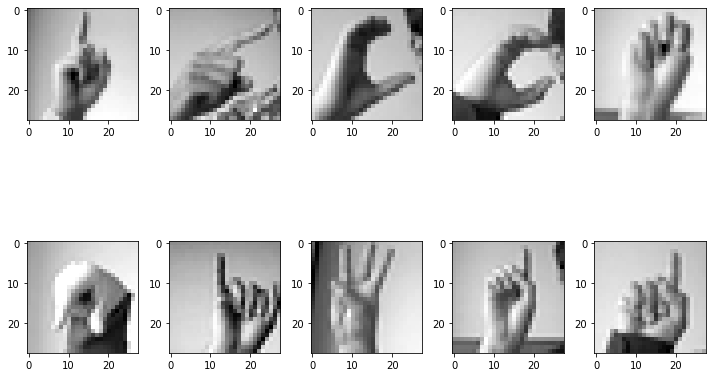

In [7]:
fig, ax = plt.subplots(2,5) 
fig.set_size_inches(10, 10)
k = 0
for i in range(2):
    for j in range(5):
        ax[i,j].imshow(training_images[k].reshape(28, 28) , cmap = "gray")
        k += 1
    plt.tight_layout()

### Image Augmentation

In [8]:
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

validation_datagen = ImageDataGenerator(
    rescale=1 / 255
)

In [9]:
print(training_images.shape)
print(testing_images.shape)

(27701, 28, 28, 1)
(6926, 28, 28, 1)


### Training Neural Network

In [10]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(26, activation='softmax')
])

### Compile Model

In [11]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

### Train Model

In [12]:
history = model.fit(
    train_datagen.flow(training_images, training_labels, batch_size=32),
    steps_per_epoch=len(training_images) / 32,
    epochs=10,
    validation_data=validation_datagen.flow(testing_images, testing_labels, batch_size=32),
    validation_steps=len(testing_images) / 32
)

Epoch 1/10
865/865 [==============================] - 13s 12ms/step - loss: 2.9151 - accuracy: 0.1228 - val_loss: 1.9556 - val_accuracy: 0.3210
Epoch 2/10
865/865 [==============================] - 9s 11ms/step - loss: 2.0172 - accuracy: 0.3572 - val_loss: 1.1054 - val_accuracy: 0.6125
Epoch 3/10
865/865 [==============================] - 9s 11ms/step - loss: 1.5620 - accuracy: 0.4921 - val_loss: 1.0111 - val_accuracy: 0.6396
Epoch 4/10
865/865 [==============================] - 9s 11ms/step - loss: 1.2905 - accuracy: 0.5765 - val_loss: 0.7258 - val_accuracy: 0.7381
Epoch 5/10
865/865 [==============================] - 8s 10ms/step - loss: 1.1006 - accuracy: 0.6335 - val_loss: 0.7977 - val_accuracy: 0.7195
Epoch 6/10
865/865 [==============================] - 8s 10ms/step - loss: 0.9599 - accuracy: 0.6840 - val_loss: 0.5331 - val_accuracy: 0.8159
Epoch 7/10
865/865 [==============================] - 8s 10ms/step - loss: 0.8579 - accuracy: 0.7137 - val_loss: 0.4848 - val_accuracy: 0.833

### Evaluate

In [13]:
model.evaluate(testing_images, testing_labels, verbose=0)

[106.27022552490234, 0.7609009742736816]

### Accuracy and Validation Score

In [14]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

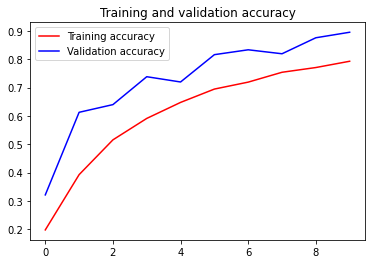

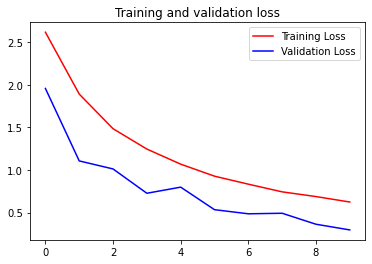

In [15]:
plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()


plt.show()

### Prediction

In [16]:
predictions = model.predict_classes(testing_images)
for i in range(len(predictions)):
    if(predictions[i] >= 9):
        predictions[i] += 1
predictions[:5]

C:\Users\mdmos\anaconda3\envs\tf2.4\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([ 2,  5, 11,  0, 18], dtype=int64)

### Classification Report

In [17]:
classes = ["Class " + str(i) for i in range(26) if i != 9]
print(classification_report(data_test['label'], predictions, target_names = classes))

              precision    recall  f1-score   support

     Class 0       0.89      0.67      0.77       316
     Class 1       1.00      0.61      0.76       422
     Class 2       0.76      0.96      0.85       300
     Class 3       0.94      0.27      0.42       231
     Class 4       0.78      0.81      0.79       479
     Class 5       0.83      0.97      0.89       241
     Class 6       0.93      0.60      0.73       335
     Class 7       0.94      0.71      0.81       421
     Class 8       0.75      0.92      0.83       276
    Class 10       0.00      0.00      0.00       319
    Class 11       0.00      0.00      0.00       201
    Class 12       0.00      0.00      0.00       382
    Class 13       0.12      0.24      0.16       281
    Class 14       0.00      0.00      0.00       238
    Class 15       0.00      0.00      0.00       328
    Class 16       0.00      0.00      0.00       157
    Class 17       0.00      0.00      0.00       142
    Class 18       0.00    

C:\Users\mdmos\anaconda3\envs\tf2.4\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\mdmos\anaconda3\envs\tf2.4\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\mdmos\anaconda3\envs\tf2.4\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\mdmos\anaconda3\envs\

### Confusion Matrix

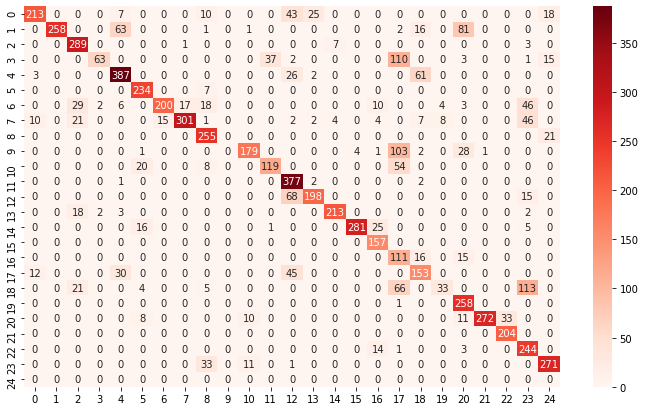

In [18]:
cm = confusion_matrix(data_test['label'],predictions)

plt.figure(figsize=(12,7))
g = sns.heatmap(
    cm, cmap='Reds',annot=True,
    fmt=''
)